# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Exploring and transforming the original dataset

In [2]:
acorn_details = pd.read_csv(f"../data/archive/acorn_details.csv").reset_index(drop=True)

In [3]:
acorn_info = acorn_details.groupby(['MAIN_CATEGORIES', 'CATEGORIES'])['REFERENCE'].unique().to_dict()
heading = ''
for ac in acorn_info:
    if heading != ac[0]:
        heading = ac[0]
        print(heading)
    print(f'   {heading}: {ac[1]}')
    for j in range(len(acorn_info[ac])):
        print(f'\t{j+1}. {acorn_info[ac][j]}')

COMMUNITY SAFETY
   COMMUNITY SAFETY: Crime Survey for England
	1. Too lenient sentencing
	2. Poverty
	3. Lack of discipline from school
	4. Lack of discipline from parents
	5. Drugs
	6. Alcohol
	7. Unemployment
	8. Breakdown of family
	9. Too few police
	10. Home being broken into
	11. Being mugged and robbed
	12. Having my car stolen
	13. Things being stolen from my car
	14. Being physically attacked by strangers
	15. Being raped
	16. Being attacked because of skin colour, ethnic origin or religion
	17. The police in this area can be relied on to be there when you need them
	18. The police in this area would treat you with respect if you had contact with them
	19. The police in this area treat everyone fairly regardless of who they are
	20. The police in this area understand the issues that affect this community
	21. The police in this area are dealing with the things that matter to this community
	22. Taking everything into account I have confidence in the police in this area
CONTAC

## Reducing the rows

we only need household info hence we are going to keep:
1. ECONOMY: Economic Activity
2. FAMILY
3. FINANCE: Household Annual Income
4. FINANCE: Financial Situation
5. HOUSING (except HOUSING: Moving House and HOUSING: House Tenure)

In [4]:
conditions = (
    ((acorn_details['MAIN_CATEGORIES'] == 'ECONOMY') & (acorn_details['CATEGORIES'] == 'Economic Activity')) |
    (acorn_details['MAIN_CATEGORIES'] == 'FAMILY') |
    ((acorn_details['MAIN_CATEGORIES'] == 'FINANCE') & (acorn_details['CATEGORIES'].isin(['Household Annual Income', 'Financial Situation']))) |
    ((acorn_details['MAIN_CATEGORIES'] == 'HOUSING') & (acorn_details['CATEGORIES'] != 'Moving House') & (acorn_details['CATEGORIES'] != 'House Tenure')) 
)

df = acorn_details[conditions].reset_index(drop=True)
df['REFERENCE'] = df['REFERENCE'].str.replace("�", "£", regex=False)

In [5]:
df_info = df.groupby(['MAIN_CATEGORIES', 'CATEGORIES'])['REFERENCE'].unique().to_dict()
heading = ''
for ac in df_info:
    if heading != ac[0]:
        heading = ac[0]
        print(heading)
    print(f'   {heading}: {ac[1]}')
    for j in range(len(df_info[ac])):
        print(f'\t{j+1}. {df_info[ac][j]}')

ECONOMY
   ECONOMY: Economic Activity
	1. Employee Full-Time
	2. Employee Part-Time
	3. Self-employed
	4. Retired
	5. Unemployed and seeking work
	6. Student
	7. Looking after home or family
	8. Other economic activity
FAMILY
   FAMILY: Children in household
	1. Children at home : 0
	2. Children at home : 1
	3. Children at home : 2
	4. Children at home : 3+
   FAMILY: Household Size
	1. Household size : 1 person
	2. Household size : 2 persons
	3. Household size : 3-4 persons
	4. Household size : 5+ persons
   FAMILY: Structure
	1. Couple family no children
	2. Couple family with dependent children
	3. Lone parent family with dependent children
	4. All pensioner households
	5. All student households
	6. One person household (non-pensioner)
	7. Other household structure
FINANCE
   FINANCE: Financial Situation
	1. Saving
	2. Not saving
	3. Saving a lot
	4. Saving a little
	5. Just managing to make ends meet
	6. Drawing on savings or running into debt
   FINANCE: Household Annual Income
	1

In [6]:
numerical_columns = ['ACORN-A', 'ACORN-B',
       'ACORN-C', 'ACORN-D', 'ACORN-E', 'ACORN-F', 'ACORN-G', 'ACORN-H',
       'ACORN-I', 'ACORN-J', 'ACORN-K', 'ACORN-L', 'ACORN-M', 'ACORN-N',
       'ACORN-O', 'ACORN-P', 'ACORN-Q']
obj_columns = ['MAIN_CATEGORIES', 'CATEGORIES', 'REFERENCE']

grouped = df.groupby(['MAIN_CATEGORIES', 'CATEGORIES'])[numerical_columns]
# summing groups by acorn
grouped_sums = grouped.transform('sum')

In [7]:
# turning the numbers to percentage
df[numerical_columns] = (df[numerical_columns] / grouped_sums )* 100

In [8]:
df

,MAIN_CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,HOUSING,House Type,Bungalow,17.771084,15.772871,31.034483,10.344828,10.450820,26.592357,18.146718,17.917676,50.931677,13.381995,12.007874,15.384615,16.120907,14.414414,10.392610,11.737089,10.526316
1,HOUSING,House Type,Detached house,64.909639,66.088328,35.893417,9.330629,20.081967,45.700637,39.189189,14.285714,17.142857,14.841849,7.480315,7.692308,6.297229,5.405405,4.618938,4.460094,2.736842
2,HOUSING,House Type,Flat or maisonette,5.421687,3.943218,7.366771,55.578093,40.163934,2.707006,4.247104,4.116223,6.708075,7.299270,58.858268,11.778846,7.304786,35.810811,36.951501,33.333333,58.315789
3,HOUSING,House Type,Semi-detached house,8.433735,11.041009,21.786834,7.302231,13.524590,18.949045,18.532819,46.489104,21.366460,24.817518,6.496063,17.307692,35.012594,28.153153,9.006928,21.596244,10.947368
4,HOUSING,House Type,Terraced house,3.463855,3.154574,3.918495,17.444219,15.778689,6.050955,19.884170,17.191283,3.850932,39.659367,15.157480,47.836538,35.264484,16.216216,39.030023,28.873239,17.473684
5,HOUSING,House Size,Number of Beds : 1,2.340597,2.878598,6.130268,33.184524,23.090278,7.385230,6.036217,4.176904,18.571429,12.211982,29.306488,12.406948,15.469613,54.934823,32.142857,17.232376,49.618321
6,HOUSING,House Size,Number of Beds : 2,2.179177,3.504380,13.793103,16.815476,21.527778,15.568862,14.486922,11.547912,33.571429,26.728111,11.968680,28.535980,23.204420,24.581006,34.453782,26.892950,29.198473
7,HOUSING,House Size,Number of Beds : 3,3.470541,8.886108,20.881226,8.928571,12.673611,22.155689,22.535211,35.872236,22.380952,23.963134,5.033557,28.535980,37.845304,13.407821,14.915966,31.592689,12.022901
8,HOUSING,House Size,Number of Beds : 4,24.374496,43.554443,30.651341,16.964286,19.965278,28.742515,31.790744,26.781327,15.238095,20.506912,10.067114,14.888337,13.812155,4.096834,9.033613,14.882507,5.916031
9,HOUSING,House Size,Number of Beds : 5 plus,67.635190,41.176471,28.544061,24.107143,22.743056,26.147705,25.150905,21.621622,10.238095,16.589862,43.624161,15.632754,9.668508,2.979516,9.453782,9.399478,3.244275


## Trying to explore the data more

In [9]:
grouped_by = df.groupby(['MAIN_CATEGORIES', 'CATEGORIES'])
grouped = grouped_by[numerical_columns]

In [10]:
grouped.max()

ACORN-A    ACORN-B    ACORN-C  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity        21.365360  18.565401  21.598878   
FAMILY          Children in household    29.362881  30.809399  33.534743   
                Household Size           32.241814  31.233596  33.333333   
                Structure                25.795053  23.890785  27.461140   
FINANCE         Financial Situation      28.744327  26.086957  21.314103   
                Household Annual Income  36.762590  28.694901  17.058096   
HOUSING         House Size               67.635190  43.554443  30.651341   
                House Type               64.909639  66.088328  35.893417   
                House Value              80.652368  32.182741  26.943700   

                                           ACORN-D    ACORN-E    ACORN-F  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity        19.459459  17.827298  21.555252   
FAMILY          Children in household    31.486880  30.534351  31.232092   
                Household Size           27.435897  27.735369  34.324324   
                Structure                27.688504  19.105691  23.170732   
FINANCE         Financial Situation      26.355422  20.578778  18.543046   
                Household Annual Income  25.648415  18.369690  17.048711   
HOUSING         House Size               33.184524  23.090278  28.742515   
                House Type               55.578093  40.163934  45.700637   
                House Value              66.578073  25.102319  26.716141   

                                           ACORN-G    ACORN-H    ACORN-I  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity        14.844804  15.543329  33.748271   
FAMILY          Children in household    27.061856  27.654321  45.018450   
                Household Size           27.480916  29.820051  40.374332   
                Structure                18.341308  19.155844  43.209877   
FINANCE         Financial Situation      19.836066  18.363940  18.319328   
                Household Annual Income  17.530864  17.198336  25.000000   
HOUSING         House Size               31.790744  35.872236  33.571429   
                House Type               39.189189  46.489104  50.931677   
                House Value              27.304965  24.869565  27.674024   

                                           ACORN-J    ACORN-K    ACORN-L  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity        17.342657  47.644928  14.769976   
FAMILY          Children in household    27.577320  39.393939  26.682692   
                Household Size           29.100529  38.043478  27.872861   
                Structure                17.541436  77.324841  17.567568   
FINANCE         Financial Situation      18.333333  22.411128  18.150685   
                Household Annual Income  17.630854  21.811460  22.018349   
HOUSING         House Size               26.728111  43.624161  28.535980   
                House Type               39.659367  58.858268  47.836538   
                House Value              35.477941  26.434783  30.664395   

                                           ACORN-M    ACORN-N    ACORN-O  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity        15.695600  23.302108  19.451074   
FAMILY          Children in household    30.530973  35.294118  29.974160   
                Household Size           27.654321  47.654321  33.248731   
                Structure                22.121212  29.523810  23.848238   
FINANCE         Financial Situation      20.277296  22.517730  18.046358   
                Household Annual Income  25.343811  55.303030  27.459016   
HOUSING         House Size               37.845304  54.934823  34.453782   
           

In [11]:
grouped.median()

ACORN-A    ACORN-B    ACORN-C  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity        12.831858  12.939522  11.500701   
FAMILY          Children in household    25.900277  24.673629  24.924471   
                Household Size           27.833753  27.690289  25.067751   
                Structure                15.194346  14.846416  12.953368   
FINANCE         Financial Situation      16.717095  17.313665  17.708333   
                Household Annual Income  14.028777  14.088159  15.203956   
HOUSING         House Size                3.470541   8.886108  20.881226   
                House Type                8.433735  11.041009  21.786834   
                House Value               3.395889  12.588832  15.683646   

                                           ACORN-D    ACORN-E    ACORN-F  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity        11.013514  11.838440  11.323329   
FAMILY          Children in household    25.072886  25.190840  24.355301   
                Household Size           25.256410  25.318066  23.513514   
                Structure                13.844252  14.363144  12.369338   
FINANCE         Financial Situation      16.716867  17.363344  17.880795   
                Household Annual Income  14.217099  15.040184  14.756447   
HOUSING         House Size               16.964286  21.527778  22.155689   
                House Type               10.344828  15.778689  18.949045   
                House Value               5.913621  12.824011  12.615955   

                                           ACORN-G    ACORN-H    ACORN-I  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity        12.483131  11.898212   9.612725   
FAMILY          Children in household    25.644330  24.567901  21.402214   
                Household Size           26.972010  26.735219  25.401070   
                Structure                15.470494  16.396104  10.582011   
FINANCE         Financial Situation      16.967213  16.944908  17.058824   
                Household Annual Income  14.691358  14.979196  14.312977   
HOUSING         House Size               22.535211  21.621622  18.571429   
                House Type               18.532819  17.191283  17.142857   
                House Value              13.652482  15.304348  11.714771   

                                           ACORN-J    ACORN-K    ACORN-L  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity        12.307692   6.295290  12.651332   
FAMILY          Children in household    25.773196  22.895623  24.879808   
                Household Size           25.132275  22.282609  24.083130   
                Structure                14.364641   3.524416  15.165165   
FINANCE         Financial Situation      17.250000  15.378671  16.866438   
                Household Annual Income  14.876033  14.787431  14.862385   
HOUSING         House Size               20.506912  11.968680  15.632754   
                House Type               14.841849  12.007874  15.384615   
                House Value               9.558824  14.260870  11.073254   

                                           ACORN-M    ACORN-N    ACORN-O  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity        12.485137  11.592506  12.171838   
FAMILY          Children in household    24.446903  22.600619  24.289406   
                Household Size           24.938272  20.000000  23.984772   
                Structure                13.939394  12.698413  12.195122   
FINANCE         Financial Situation      16.204506  15.602837  16.639073   
                Household Annual Income  14.538310   8.333333  14.549180   
HOUSING         House Size               15.469613  13.407821  14.915966   
           

In [12]:
grouped.min()

ACORN-A    ACORN-B    ACORN-C  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity         3.666245   5.907173   6.451613   
FAMILY          Children in household    18.836565  19.843342  16.616314   
                Household Size           12.090680  13.385827  16.531165   
                Structure                 2.826855   3.924915   2.590674   
FINANCE         Financial Situation       8.774584   9.472050  12.019231   
                Household Annual Income   1.366906   2.592913   8.034611   
HOUSING         House Size                2.179177   2.878598   6.130268   
                House Type                3.463855   3.154574   3.918495   
                House Value               0.580876   1.725888   2.144772   

                                           ACORN-D    ACORN-E    ACORN-F  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity         5.405405   6.824513   6.275580   
FAMILY          Children in household    18.367347  19.083969  20.057307   
                Household Size           22.051282  21.628499  18.648649   
                Structure                 6.798517   6.910569   0.871080   
FINANCE         Financial Situation      10.542169  13.183280  13.245033   
                Household Annual Income   4.130644   6.314581  10.601719   
HOUSING         House Size                8.928571  12.673611   7.385230   
                House Type                7.302231  10.450820   2.707006   
                House Value               2.524917   5.457026   6.493506   

                                           ACORN-G    ACORN-H    ACORN-I  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity         9.716599  10.591472   6.500692   
FAMILY          Children in household    21.649485  23.209877  12.177122   
                Household Size           18.575064  16.709512   8.823529   
                Structure                 7.017544   4.870130   1.763668   
FINANCE         Financial Situation      13.934426  14.858097  14.453782   
                Household Annual Income   7.407407  10.124827   4.580153   
HOUSING         House Size                6.036217   4.176904  10.238095   
                House Type                4.247104   4.116223   3.850932   
                House Value               6.382979   6.086957   6.112054   

                                           ACORN-J    ACORN-K    ACORN-L  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity         8.671329   2.355072  10.048426   
FAMILY          Children in household    20.876289  14.814815  23.557692   
                Household Size           20.634921  17.391304  23.960880   
                Structure                 8.701657   1.571125   9.009009   
FINANCE         Financial Situation      14.333333  13.601236  14.554795   
                Household Annual Income   9.641873   4.436229   4.036697   
HOUSING         House Size               12.211982   5.033557  12.406948   
                House Type                7.299270   6.496063   7.692308   
                House Value               6.801471   4.521739   4.258944   

                                           ACORN-M    ACORN-N    ACORN-O  \
MAIN_CATEGORIES CATEGORIES                                                 
ECONOMY         Economic Activity         9.155767   6.674473   8.591885   
FAMILY          Children in household    20.575221  19.504644  21.447028   
                Household Size           22.469136  12.345679  18.781726   
                Structure                 4.393939   2.698413   9.485095   
FINANCE         Financial Situation      12.131716   9.929078  15.231788   
                Household Annual Income   3.143418   0.505051   2.254098   
HOUSING         House Size                9.668508   2.979516   9.033613   
           

In [13]:
opr = 'max'
print(f'avg of {opr}: {grouped.max()[numerical_columns].values.flatten().mean()}')
print(f'max of {opr}: {grouped.max()[numerical_columns].values.flatten().max()}')
print(f'min of {opr}: {grouped.max()[numerical_columns].values.flatten().min()}')

avg of max: 31.459664778745832
max of max: 80.65236818588025
min of max: 14.769975786924938


In [14]:
opr = 'min'
print(f'avg of {opr}: {grouped.min()[numerical_columns].values.flatten().mean()}')
print(f'max of {opr}: {grouped.min()[numerical_columns].values.flatten().max()}')
print(f'min of {opr}: {grouped.min()[numerical_columns].values.flatten().min()}')

avg of min: 9.259553960058831
max of min: 23.96088019559902
min of min: 0.2570694087403599


In [15]:
opr = 'median'
print(f'avg of {opr}: {grouped.median()[numerical_columns].values.flatten().mean()}')
print(f'max of {opr}: {grouped.median()[numerical_columns].values.flatten().max()}')
print(f'min of {opr}: {grouped.median()[numerical_columns].values.flatten().min()}')

avg of median: 16.276726575919884
max of median: 27.83375314861461
min of median: 3.395889186773905


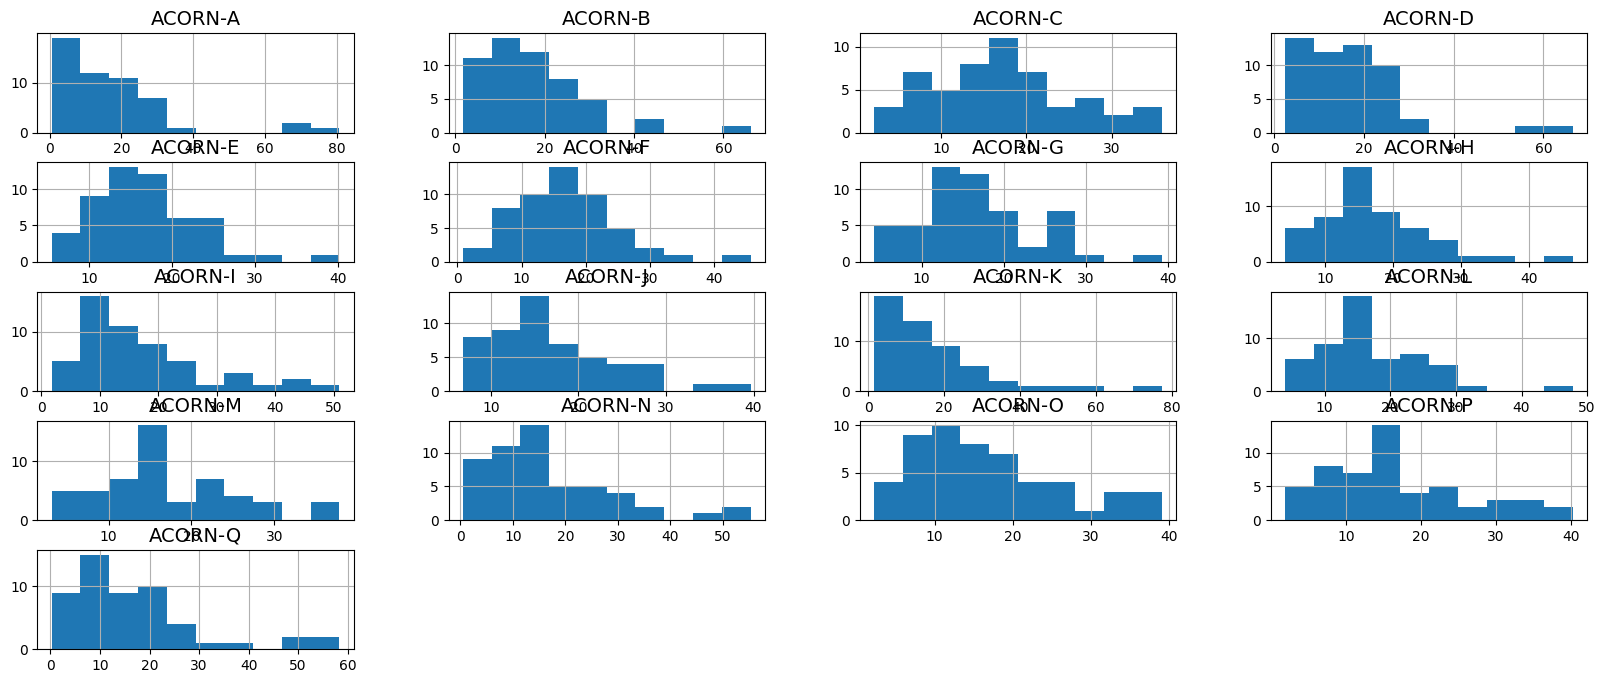

In [16]:
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=10, figsize=(20, 8))
plt.show()

In [21]:
# a function to retrieve reference and categories columns based on Acorn

def get_reference(numerical_column):
    max_table = df.groupby(['MAIN_CATEGORIES', 'CATEGORIES'])[[numerical_column]].max().reset_index()

    # initializing an empty condition
    condition = pd.Series([False] * len(df))

    # building condition
    for i in range(len(max_table)):
        current_condition = (
            (df['MAIN_CATEGORIES'] == max_table['MAIN_CATEGORIES'][i]) &
            (df['CATEGORIES'] == max_table['CATEGORIES'][i]) &
            (df[numerical_column] == max_table[numerical_column][i])
        )
        condition |= current_condition
    return df.loc[condition][obj_columns[1:]].reset_index(drop=True)

# Creating a new df with acorn as a column

things that are numerical
1. Number of bedrooms
2. House value
3. Number of children
4. Household Size
5. Household Annual Income

In [17]:
new_df = pd.DataFrame({'acorn_id' : [i+1 for i in range(len(numerical_columns))],
                       'acorn': numerical_columns})

In [18]:
new_df['bedrooms'] = 0
new_df['house_value'] = 0
new_df['no_of_children'] = 0
new_df['tot_ppl'] = 0
new_df['income'] = 0
new_df['employment'] = None
new_df['family_structure'] = None
new_df['savings'] = None
new_df['house_type'] = None

In [19]:
def map_columns(value):
    mapping = {
        'House Size': 'bedrooms',
        'House Value': 'house_value',
        'Children in household': 'no_of_children',
        'Household Size': 'tot_ppl',
        'Household Annual Income': 'income',
        'Economic Activity': 'employment',
        'Structure': 'family_structure',
        'Financial Situation': 'savings',
        'House Type': 'house_type'

    }
    return mapping.get(value)

def map_everything(value):
    mapping = {
        'Number of Beds : 1': 1,
        'Number of Beds : 2': 2,
        'Number of Beds : 3': 3,
        'Number of Beds : 4': 4,
        'Number of Beds : 5 plus': 5,
        'House Value up to 100k': 50,
        'House Value 100k-150k': 125,
        'House Value 150k-250k': 200, 
        'House Value 250k-500k': 375,
        'House Value 500k-750k': 625, 
        'House Value 750k-1m': 875, 
        'House Value 1m+': 1000,
        'Children at home : 0': 0,
        'Children at home : 1': 1,
        'Children at home : 2': 2,
        'Children at home : 3+': 3,
        'Household size : 1 person': 1,
        'Household size : 2 persons': 2,
        'Household size : 3-4 persons': 3.5,  
        'Household size : 5+ persons': 5,
        '£0-£20,000': 10,
        '£20,000-£40,000': 30,
        '£40,000-£60,000': 50,
        '£60,000-£80,000': 70,
        '£80,000-£100,000': 90,
        '£100,000+': 100,
        'Average Household Income': 40,
        "Employee Full-Time": 'full_time_employee',
        "Employee Part-Time": 'part_time_employee',
        "Self-employed": 'self_employed',
        "Retired": 'retired',
        "Unemployed and seeking work": 'unemployeed_seeking work',
        "Student": 'student',
        "Looking after home or family": 'taking_care_of_home_family',
        "Other economic activity": 'other',
        "Couple family no children": 'couple',
        "Couple family with dependent children": 'couple_with_dependent_children',
        "Lone parent family with dependent children": 'single_parent_dependent_children',
        "All pensioner households": 'all_pensioners',
        "All student households": 'all_students',
        "One person household (non-pensioner)": '1_non_pensioner',
        "Other household structure": 'other',
        "Saving": 'saving',
        "Not saving": 'not_saving',
        "Saving a lot": 'saving_a_lot',
        "Saving a little": 'saving_little',
        "Just managing to make ends meet": 'just_managing',
        "Drawing on savings or running into debt": 'using_savings_in_debt',
        "Bungalow": 'bungalow',
        "Detached house": 'detached_house',
        "Flat or maisonette": 'flat_maisonette',
        "Semi-detached house": 'semi_detached',
        "Terraced house": 'terraced',
    }
    return mapping.get(value)


In [22]:
for numerical_column in numerical_columns:
    # getting info on acorn    
    reference_acorn = get_reference(numerical_column)
    for index in range(len(reference_acorn)):
        # getting the column name and changing it for the df
        column_name = map_columns(reference_acorn.iloc[index:index+1, :]['CATEGORIES'][index])
        if column_name != None:
            # inplacing the new value
            value = map_everything(reference_acorn.iloc[index:index+1, :]['REFERENCE'][index])
            new_df.loc[new_df['acorn'] == numerical_column, column_name] = value
    

C:\Users\Ananya Gyanmote\AppData\Local\Temp\ipykernel_7172\3879871553.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[new_df['acorn'] == numerical_column, column_name] = value


In [23]:
new_df

,acorn_id,acorn,bedrooms,house_value,no_of_children,tot_ppl,income,employment,family_structure,savings,house_type
0,1,ACORN-A,5,1000,0,5.0,100,self_employed,couple_with_dependent_children,saving_a_lot,detached_house
1,2,ACORN-B,4,875,2,3.5,100,self_employed,couple_with_dependent_children,saving_a_lot,detached_house
2,3,ACORN-C,4,875,0,2.0,90,retired,all_pensioners,saving_a_lot,detached_house
3,4,ACORN-D,1,1000,0,3.5,100,self_employed,all_students,saving_a_lot,flat_maisonette
4,5,ACORN-E,1,625,1,3.5,90,full_time_employee,all_students,saving_a_lot,flat_maisonette
5,6,ACORN-F,4,200,0,2.0,50,self_employed,all_pensioners,saving_little,detached_house
6,7,ACORN-G,4,200,2,2.0,70,self_employed,couple_with_dependent_children,saving_a_lot,detached_house
7,8,ACORN-H,3,200,2,3.5,50,part_time_employee,other,saving_a_lot,semi_detached
8,9,ACORN-I,2,125,0,1.0,10,retired,all_pensioners,saving_little,bungalow
9,10,ACORN-J,2,200,1,2.0,50,full_time_employee,1_non_pensioner,saving_a_lot,terraced


In [24]:
new_df.to_csv('../data/acorn_details.csv')

# Delete

In [ ]:
df_info = df.groupby(['MAIN_CATEGORIES', 'CATEGORIES'])['REFERENCE'].unique().to_dict()
heading = ''
for ac in df_info:
    if heading != ac[0]:
        heading = ac[0]
        # print(heading)
    if map_columns(ac[1]) != None:
        # print(f'   {heading}: {ac[1]}')
        print(f'{map_columns(ac[1])}')

        for j in range(len(df_info[ac])):
            # print(f'\t{j+1}. {df_info[ac][j]}')
            print(f'"{map_everything(df_info[ac][j])}",')
        print()

In [ ]:
get_reference(numerical_columns[0])

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df[numerical_columns])
df_scaled = pd.DataFrame(data=df_scaled, columns=numerical_columns).reset_index(drop=True)

In [ ]:
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(20, 8))
plt.show()

In [ ]:
df_std = df
df_std[numerical_columns] = df_scaled[numerical_columns]

In [ ]:
df_std.columns

In [ ]:
df_scaled

In [ ]:
df_std